In [1]:
import pandas as pd
dataset = pd.read_csv('KaggleV2-May-2016.csv')
dataset
dataset.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
len(dataset)

110527

In [3]:
column_name = 'No-show'
dataset[column_name].replace({'No': 0, 'Yes': 1}, inplace=True)
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [4]:
X = pd.DataFrame(dataset.iloc[:,7:13])
X

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
110522,0,0,0,0,0,1
110523,0,0,0,0,0,1
110524,0,0,0,0,0,1
110525,0,0,0,0,0,1


In [5]:
Y = pd.DataFrame(dataset.iloc[:,-1])
Y

,No-show
0,0
1,0
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=5)
classifier.fit(X_train, Y_train)

/tmp/ipykernel_20869/2862424208.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5, n_estimators=20, random_state=1)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[17635     0]
 [ 4471     0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17635
           1       0.00      0.00      0.00      4471

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

0.7977472179498779


/home/endin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/endin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/endin/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
feature_imp = pd.Series(classifier.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

SMS_received    0.769571
Hipertension    0.109858
Scholarship     0.065199
Handcap         0.023450
Alcoholism      0.018209
Diabetes        0.013713
dtype: float64

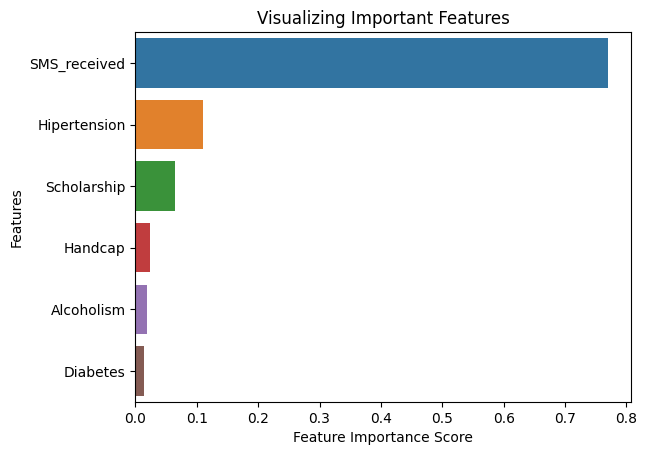

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [12]:
ab = dataset.loc[(dataset['Alcoholism'] == 1) & (dataset['No-show'] == 0) & (dataset['Handcap'] == 1) & (dataset['Hipertension'] == 1) & (dataset['Diabetes'] == 1)  & (dataset['SMS_received'] == 1)] 

In [13]:
ab

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
106517,8.588652e+12,5690452,F,2016-05-12T10:04:18Z,2016-06-01T00:00:00Z,54,JESUS DE NAZARETH,0,1,1,1,1,1,0
106544,8.588652e+12,5758023,F,2016-06-01T10:09:39Z,2016-06-07T00:00:00Z,54,JESUS DE NAZARETH,0,1,1,1,1,1,0


In [19]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold=0.1)
feat_sel.fit(X_train, Y_train)

/home/endin/.local/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=20,
                                                 random_state=1),
                threshold=0.1)

In [20]:
X_imp_train = feat_sel.transform(X_train)
X_imp_test = feat_sel.transform(X_test)

In [16]:
clf_imp = RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=3)
clf_imp.fit(X_imp_train, Y_train)

/tmp/ipykernel_20869/1632159212.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_imp.fit(X_imp_train, Y_train)


RandomForestClassifier(max_depth=2, n_estimators=20, random_state=1)

In [17]:
y_pred = classifier.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7977472179498779

In [18]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(Y_test, y_imp_pred)

0.7977472179498779